In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [2]:
data = pd.read_csv(r'F:\amruth\after_preprocess_data.csv', encoding = 'iso-8859-1')
data.head()

,number_of_rooms,floor_on,total_floors,bedroom,pincode,balkon,terrasse,garten,Gaste-WC,Aufzug,wohung,construction_year,living_area_m2,transform_price
0,2.0,0,0,0,12209,1,1,0,0,0,1,1997,4.043051,8.535089
1,3.0,0,0,0,12209,1,1,0,0,0,1,1997,4.442651,8.517393
2,5.0,0,3,3,12209,1,1,1,1,1,0,2021,5.259732,8.653742
3,2.5,1,2,1,12209,1,1,0,0,0,1,1968,4.335197,8.638011
4,2.5,2,2,2,12209,1,1,1,0,0,1,2018,4.262680,8.443301


In [3]:
X = data.iloc[:, :-1]
y = data[['transform_price']]

In [4]:
y.columns

Index(['transform_price'], dtype='object')

In [5]:
X.shape, y.shape

((12743, 13), (12743, 1))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.025, random_state = 0)
X_train.shape, y_train.shape, X_test.shape

((12424, 13), (12424, 1), (319, 13))

In [7]:
tf.random.set_seed(0)
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    tf.keras.layers.SimpleRNN(100, return_sequences = True),
    tf.keras.layers.SimpleRNN(80, return_sequences = True),
    tf.keras.layers.SimpleRNN(40),
    tf.keras.layers.Dense(1)
])
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

In [8]:
history=model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs=50, batch_size = 64)
predictions = model.predict(X_test)


Train on 12424 samples, validate on 319 samples
Epoch 1/50
12424/12424 [==============================] - 5s 367us/sample - loss: 1.0659 - mae: 0.4718 - val_loss: 0.1492 - val_mae: 0.2754
Epoch 2/50
12424/12424 [==============================] - 3s 270us/sample - loss: 0.1220 - mae: 0.2567 - val_loss: 0.1261 - val_mae: 0.2503
Epoch 3/50
12424/12424 [==============================] - 5s 374us/sample - loss: 0.1146 - mae: 0.2499 - val_loss: 0.1185 - val_mae: 0.2445
Epoch 4/50
12424/12424 [==============================] - 4s 310us/sample - loss: 0.1122 - mae: 0.2476 - val_loss: 0.1181 - val_mae: 0.2451
Epoch 5/50
12424/12424 [==============================] - 3s 255us/sample - loss: 0.1121 - mae: 0.2471 - val_loss: 0.1136 - val_mae: 0.2416
Epoch 6/50
12424/12424 [==============================] - 4s 313us/sample - loss: 0.1104 - mae: 0.2459 - val_loss: 0.1225 - val_mae: 0.2518
Epoch 7/50
12424/12424 [==============================] - 3s 258us/sample - loss: 0.1093 - mae: 0.2438 - val_los

In [9]:
predictions[:10], y_test.to_numpy()[:10]

(array([[8.513754 ],
        [8.359654 ],
        [8.362559 ],
        [8.096525 ],
        [7.8679805],
        [8.8309965],
        [8.591897 ],
        [8.43015  ],
        [8.434506 ],
        [8.665655 ]], dtype=float32),
 array([[8.54500289],
        [8.37047041],
        [8.69484149],
        [7.71760729],
        [7.7403941 ],
        [8.80751024],
        [8.25992587],
        [8.85311972],
        [8.44308082],
        [8.96784072]]))

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(predictions, y_test), mean_absolute_error(predictions, y_test)

(0.10259744167189298, 0.23314696337492352)

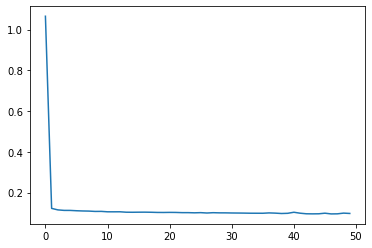

In [11]:
epochs = 150
plt.plot(range(0, len(history.history["loss"])), history.history["loss"][0:])

In [13]:
array = []
for i in data.columns[:-1]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
#sq = float(input('cs'))
#array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
#sqr_living_m2 = two_dim[-1][0]
#(two_dim)
#model.predict(two_dim)

Enter the value of number_of_rooms : 1
Enter the value of floor_on : 2
Enter the value of total_floors : 3
Enter the value of bedroom : 2
Enter the value of pincode : 12209
Enter the value of balkon : 1
Enter the value of terrasse : 1
Enter the value of garten : 0
Enter the value of Gaste-WC : 1
Enter the value of Aufzug : 1
Enter the value of wohung : 1
Enter the value of construction_year : 1990
Enter the value of living_area_m2 : 54.87


In [14]:
two_dim

[[1.0, 2.0, 3.0, 2.0, 12209.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1990.0, 54.87]]

In [15]:
two_dim[-1][-1]

54.87

In [16]:
to = pd.DataFrame(two_dim)
score = model.predict(to)
score

array([[6.9857206]], dtype=float32)

In [18]:
original_score = np.expm1(score) * two_dim[-1][-1]
print('The price of house is {}'.format(original_score))

The price of house is [[59264.273]]


In [ ]:
np.expm1(6.595112) * 36.14

In [19]:
array = []
for i in data.columns[:-2]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('living_sq_m2'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim1 = str_to_float
#sqr_living_m2 = two_dim[-1][0]
#(two_dim)
#model.predict(two_dim)

Enter the value of number_of_rooms : 1
Enter the value of floor_on : 2
Enter the value of total_floors : 3
Enter the value of bedroom : 2
Enter the value of pincode : 12209
Enter the value of balkon : 3
Enter the value of terrasse : 2
Enter the value of garten : 1
Enter the value of Gaste-WC : 1
Enter the value of Aufzug : 1
Enter the value of wohung : 1
Enter the value of construction_year : 2000
living_sq_m267


In [20]:
score = model.predict(pd.DataFrame(two_dim1))
score

array([[8.636968]], dtype=float32)

In [21]:
original_score = np.expm1(score) * np.expm1(two_dim1[-1][-1])
print('The price of house is {}'.format(original_score))

The price of house is [[377559.25]]


In [ ]:
array = []
for i in data.columns[:-2]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('living_sq_m2'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim2 = str_to_float
#sqr_living_m2 = two_dim[-1][0]
#(two_dim)
#model.predict(two_dim)

In [ ]:
two_dim2

In [ ]:
score1 = model.predict(pd.DataFrame(two_dim2))
score1

In [ ]:
original_score = np.expm1(score1) * np.expm1(two_dim2[-1][-1])
print('The price of house is {}'.format(original_score))

In [22]:
array = []
for i in data.columns[:-2]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('living_sq_m2'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim3 = str_to_float
print(two_dim3)
score3 = model.predict(pd.DataFrame(two_dim3))
original_score = np.expm1(score3) * np.expm1(two_dim3[-1][-1])
print('The price of house is {}'.format(original_score))

Enter the value of number_of_rooms : 1
Enter the value of floor_on : 2
Enter the value of total_floors : 3
Enter the value of bedroom : 2
Enter the value of pincode : 12345
Enter the value of balkon : 3
Enter the value of terrasse : 2
Enter the value of garten : 1
Enter the value of Gaste-WC : 1
Enter the value of Aufzug : 1
Enter the value of wohung : 1
Enter the value of construction_year : 2000
living_sq_m267
[[1.0, 2.0, 3.0, 2.0, 12345.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2000.0, 4.219507705176107]]
The price of house is [[377559.25]]


In [27]:
np.expm1(score3) * np.expm1(4.21950)

array([[377556.3]], dtype=float32)

In [26]:
np.log1p(67
        )

4.219507705176107

In [ ]:
predictions[:10], y_test.to_numpy()[:10]

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(predictions, y_test), mean_absolute_error(predictions, y_test)

In [ ]:
epochs = 150
plt.plot(range(1, len(history.history["loss"])), history.history["loss"][1:])

In [ ]:
plt.plot(range(1, len(history.history["val_loss"])), history.history["val_loss"][1:])

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
sq_ftt = X_test.head(10)
sqr_ft = sq_ftt['living_area_m2']

In [ ]:
p = predictions[:10]
p = p.tolist()
y_test = y_test[:10]

y_t = y_test.to_numpy().tolist()
y_t, p

In [ ]:
for i, j, k in zip(y_t, sqr_ft, p):
    print('true',np.exp(i) * np.exp(j))
    print('pred',np.exp(k) * np.exp(j))

In [ ]:
array = []
for i in data.columns[:-1]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('cs'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
sqr_living_m2 = two_dim[-1][-1]
score = model.predict([[2.0, 2.0, 2.0, 2.0, 12209.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1980.0, 4.04]])
score
original_score = np.expm1(score) * np.expm1(sqr_living_m2)
print('The price of house is {}'.format(original_score))

In [ ]:
two_dim

In [ ]:
score = model.predict([[2.0, 2.0, 2.0, 2.0, 12209.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1980.0, 4.04]])
score